Original Audio:


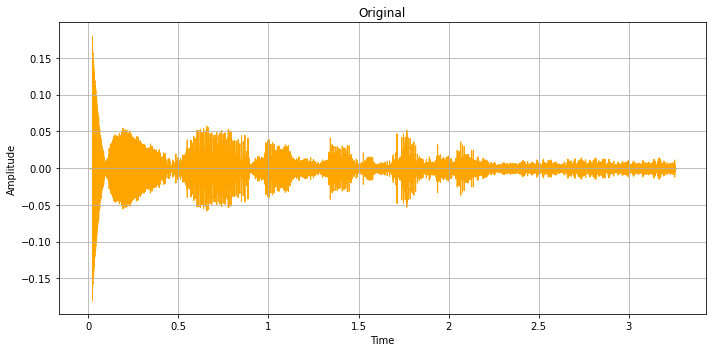

Trimmed Audio:


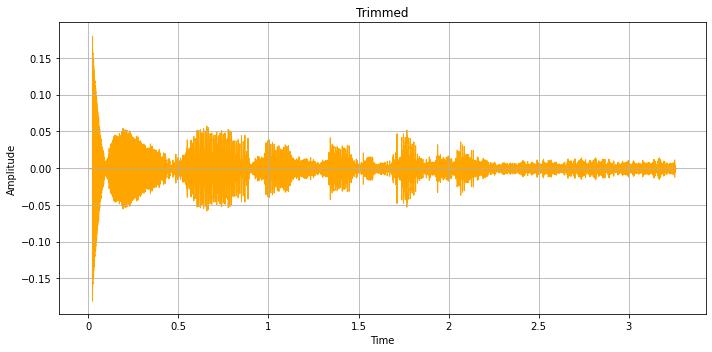

In [4]:
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

original_audio, sr = librosa.load('AIspeech.wav', sr=None)
trimmed_audio, index = librosa.effects.trim(original_audio)
sf.write('trimmed_audio.wav', trimmed_audio, sr)
trimmed,sr1 = librosa.load('trimmed_audio.wav',sr = None)

print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(original_audio, sr=sr,color='orange')
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sr))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(trimmed, sr=sr1,color='orange')
plt.title('Trimmed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()